## Product improvement statistical insight from Customer feedback using BERT.

### 1. Importing the libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


### Load Datasets

In [4]:
df = pd.read_csv('Raw Dataset/20191226-items.csv')

### Product Mapping

In [5]:
# create a new dataframe with columns for product ID, brand, and model
product_mapping = df[['asin', 'brand', 'title']].copy()

# rename the columns to match the desired format
product_mapping = product_mapping.rename(
    columns={'asin': 'product_id', 'brand': 'product_brand', 'title': 'product_model_name'})

# save the product mapping as a CSV file
product_mapping.to_csv('Raw Dataset/product_mapping.csv', index=False)


In [6]:
df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [7]:
# print all the columns
df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### Rename the columns

In [8]:
# rename the columns
df = df.rename(columns={'asin': 'product_id',
               'title': 'product_model_name', 'brand': 'product_brand'})



In [9]:
df.head()

,product_id,product_brand,product_model_name,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


### Check Missing Values

In [10]:
# Check missing values
df.isnull().sum()

product_id            0
product_brand         4
product_model_name    0
url                   0
image                 0
rating                0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
dtype: int64

In [11]:
# Change Missing values to 'Unknown'
df['product_brand'] = df['product_brand'].fillna('Unknown')

### Print which brand has the most number of products

In [12]:

df['product_brand'].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Unknown       4
Name: product_brand, dtype: int64

### Print the number of products in each brand

<Axes: >

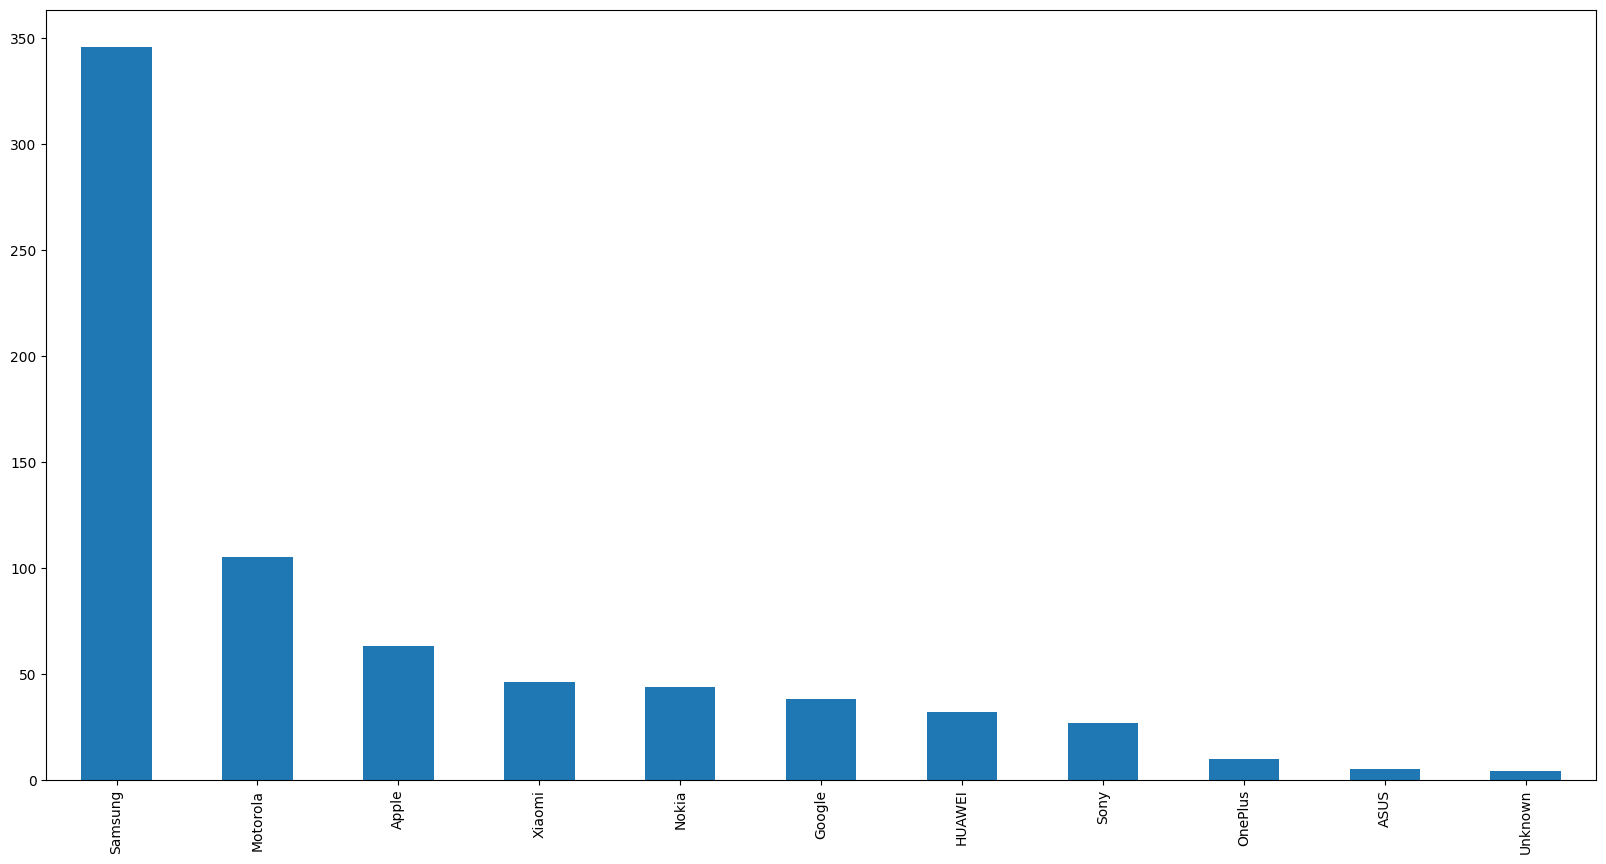

In [13]:

df['product_brand'].value_counts().plot(kind='bar', figsize=(20, 10))

In [14]:
# load reviews dataset
reviews = pd.read_csv('Raw Dataset/20191226-reviews.csv')

In [15]:
reviews.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [20]:
# Save the merged dataset as a CSV file
import pandas as pd
import os

def merge_csv():
    # List of CSV files in the folder
    file_list = os.listdir('Raw Dataset')

    # Create a list to store dataframes
    dataframes = []

    # Loop through the list of files
    for file in file_list:

        # Read the csv file
        df = pd.read_csv('Raw Dataset/' + file)

        # Add the dataframe to the list
        dataframes.append(df)

    # Merge all dataframes in the list
    merged_df = pd.concat(dataframes)

    # Save the merged dataframe to a csv file
    merged_df.to_csv('Raw Dataset/merged_dataset.csv', index=False)

if __name__ == '__main__':
    merge_csv()

In [28]:
# Columns in the merged dataset
merged_df.columns

Index(['product_id', 'product_brand', 'product_model_name', 'name', 'rating',
       'verified', 'title', 'body', 'helpfulVotes'],
      dtype='object')

In [29]:
import pandas as pd

# read the merged dataset
merged_df = pd.read_csv('Raw Dataset/merged_dataset.csv')

# reorder the columns and drop the 'asin' column
merged_df = merged_df[['product_id', 'product_brand', 'product_model_name',
                       'name', 'rating', 'verified', 'title', 'body', 'helpfulVotes']]

# save the updated dataset to a new file
merged_df.to_csv('Dataset/updated_merged_dataset.csv', index=False)


/tmp/ipykernel_11110/107859471.py:4: DtypeWarning: Columns (0,1,2,3,4,6,7,9,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Raw Dataset/merged_dataset.csv')


## Read the updated merged dataset

In [30]:
# read the updated merged dataset
merged_df = pd.read_csv('Dataset/updated_merged_dataset.csv')

/tmp/ipykernel_11110/3470234922.py:2: DtypeWarning: Columns (0,1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Dataset/updated_merged_dataset.csv')


In [31]:
# Columns name
merged_df.columns

Index(['product_id', 'product_brand', 'product_model_name', 'name', 'rating',
       'verified', 'title', 'body', 'helpfulVotes'],
      dtype='object')

In [32]:
# Print All Brands
merged_df['product_brand'].unique()

array([nan, 'Motorola', 'Nokia', 'Samsung', 'HUAWEI', 'Sony', 'Apple',
       'Google', 'ASUS', 'OnePlus', 'Xiaomi'], dtype=object)

In [33]:
from collections import Counter
import nltk

# download stopwords if not already downloaded
nltk.download('stopwords')

# get all the words from the 'body' column
words = []
for text in merged_df['body']:
    if isinstance(text, str):
        words += text.lower().split()

# remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# count the frequency of each word
word_counts = Counter(words)

# get the top 10 most common words
top_words = word_counts.most_common(20)

print(top_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('phone', 143796), ('great', 31776), ('phone.', 29276), ('battery', 27666), ('like', 26710), ('good', 26508), ('screen', 23786), ('one', 22954), ('get', 21020), ('would', 19650), ('use', 19216), ('new', 17296), ('love', 16702), ('it.', 16608), ('works', 16020), ('camera', 15740), ('really', 15010), ('even', 14462), ('samsung', 13826), ("i'm", 13794)]


## Analysis of the reviews

### Using TextBlob

In [34]:
# Most Frequent Words
merged_df = pd.DataFrame(top_words, columns=['word', 'count'])
# Print Most Frequent Words
merged_df = merged_df.sort_values(by='count', ascending=False)
merged_df.head(20)
 

,word,count
0,phone,143796
1,great,31776
2,phone.,29276
3,battery,27666
4,like,26710
5,good,26508
6,screen,23786
7,one,22954
8,get,21020
9,would,19650


In [36]:
from textblob import TextBlob
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset/updated_merged_dataset.csv")
df.dropna(inplace=True)


# Define a function to calculate the sentiment polarity of a text

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment


# Calculate the sentiment polarity of each review
df['sentiment'] = df['body'].apply(get_sentiment)

# Calculate the percentage of negative reviews for each brand
neg_reviews = df[df['sentiment'] < 0]
brand_counts = neg_reviews['product_brand'].value_counts()
total_counts = df['product_brand'].value_counts()
neg_percents = (brand_counts / total_counts) * 100

# Print the results
print("Percentage of negative reviews for each brand:")
print(neg_percents)


/tmp/ipykernel_11110/1441096686.py:5: DtypeWarning: Columns (0,1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/updated_merged_dataset.csv")


Percentage of negative reviews for each brand:
ASUS        13.636364
Apple       18.415179
Google      18.484501
HUAWEI       9.940358
Motorola    14.274084
Nokia       14.909091
OnePlus      8.187135
Samsung     17.243850
Sony        12.597015
Xiaomi       6.807964
Name: product_brand, dtype: float64


In [37]:
# Count the number of comments for each brand
brand_counts = df['product_brand'].value_counts()

# Print the result
print("Number of comments for each brand:")
print(brand_counts)


Number of comments for each brand:
Samsung     12561
Motorola     3685
Nokia        2750
Apple        1792
Google       1742
Sony         1675
Xiaomi       1557
HUAWEI       1006
OnePlus       171
ASUS          132
Name: product_brand, dtype: int64


In [38]:
# Define a function to calculate the sentiment polarity of a text using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment


# Calculate the sentiment polarity of each review
df['sentiment'] = df['body'].apply(get_sentiment)

# Filter the negative reviews by selecting only the rows where the sentiment polarity is less than 0
neg_reviews = df[df['sentiment'] < 0]

# Count the number of negative reviews for each brand
neg_counts = neg_reviews['product_brand'].value_counts()

# Print the result
print("Number of negative reviews for each brand:")
print(neg_counts)


Number of negative reviews for each brand:
Samsung     2166
Motorola     526
Nokia        410
Apple        330
Google       322
Sony         211
Xiaomi       106
HUAWEI       100
ASUS          18
OnePlus       14
Name: product_brand, dtype: int64


In [39]:
from textblob import TextBlob
import pandas as pd

# load the dataset
#df = pd.read_csv('your_dataset.csv')

# filter reviews that mention 'camera'
camera_reviews = df[df['body'].str.contains('camera')]

# define function to calculate sentiment polarity


def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


# calculate sentiment polarity for each review
camera_reviews['sentiment_polarity'] = camera_reviews['body'].apply(
    lambda x: get_sentiment_polarity(x))

# group by 'product_brand' and calculate percentage of negative reviews
camera_sentiments = camera_reviews.groupby('product_brand')[
    'sentiment_polarity'].apply(lambda x: (x < 0).sum() / len(x) * 100)

# print the percentage of negative reviews for each brand
print(camera_sentiments)


product_brand
ASUS         4.651163
Apple       17.171717
Google       7.964602
HUAWEI       1.872659
Motorola     5.958132
Nokia        5.692308
OnePlus      0.000000
Samsung      9.570662
Sony         6.574394
Xiaomi       1.366120
Name: sentiment_polarity, dtype: float64


/tmp/ipykernel_11110/3369446020.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camera_reviews['sentiment_polarity'] = camera_reviews['body'].apply(


In [40]:

# filter reviews that mention 'screen'
screen_reviews = df[df['body'].str.contains('screen')]

# define function to calculate sentiment polarity


def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


# calculate sentiment polarity for each review
screen_reviews['sentiment_polarity'] = screen_reviews['body'].apply(
    lambda x: get_sentiment_polarity(x))

# group by 'product_brand' and calculate percentage of negative reviews
screen_sentiments = screen_reviews.groupby('product_brand')[
    'sentiment_polarity'].apply(lambda x: (x < 0).sum() / len(x) * 100)

# print the percentage of negative reviews for each brand
print('Percentage for screen')
print(screen_sentiments)


# filter reviews that mention 'battery'
battery_reviews = df[df['body'].str.contains('battery')]

# calculate sentiment polarity for each review
battery_reviews['sentiment_polarity'] = battery_reviews['body'].apply(
    lambda x: get_sentiment_polarity(x))

# group by 'product_brand' and calculate percentage of negative reviews
battery_sentiments = battery_reviews.groupby('product_brand')[
    'sentiment_polarity'].apply(lambda x: (x < 0).sum() / len(x) * 100)

# print the percentage of negative reviews for each brand
print('Percentage for battery')
print(battery_sentiments)


/tmp/ipykernel_11110/2869873616.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen_reviews['sentiment_polarity'] = screen_reviews['body'].apply(


Percentage for screen
product_brand
ASUS         2.777778
Apple       26.415094
Google      18.435754
HUAWEI       4.854369
Motorola    10.444178
Nokia        8.393632
OnePlus      5.714286
Samsung     17.786012
Sony         7.640068
Xiaomi       5.135952
Name: sentiment_polarity, dtype: float64
Percentage for battery
product_brand
ASUS         8.571429
Apple       18.823529
Google      10.725552
HUAWEI       2.739726
Motorola     9.030418
Nokia        9.811321
OnePlus      0.000000
Samsung     14.485459
Sony         7.455013
Xiaomi       3.715170
Name: sentiment_polarity, dtype: float64


/tmp/ipykernel_11110/2869873616.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_reviews['sentiment_polarity'] = battery_reviews['body'].apply(


In [41]:
# Count and print the number of Model each brand has and show in a table
brand_model = df.groupby('product_brand')['product_model_name'].nunique()
print(brand_model)

product_brand
ASUS          5
Apple        60
Google       34
HUAWEI       27
Motorola     86
Nokia        41
OnePlus      10
Samsung     293
Sony         25
Xiaomi       43
Name: product_model_name, dtype: int64


In [42]:
# filter reviews that belong to Samsung brand
samsung_reviews = df[df['product_brand'] == 'Samsung']

# define function to calculate sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# calculate sentiment polarity for each review
samsung_reviews['sentiment_polarity'] = samsung_reviews['body'].apply(lambda x: get_sentiment_polarity(x))

# calculate the average sentiment polarity for each Samsung model
model_sentiments = samsung_reviews.groupby('product_model_name')['sentiment_polarity'].mean()

# sort the models based on their average sentiment polarity in descending order
sorted_models = model_sentiments.sort_values(ascending=False)

# print the model with the highest average sentiment polarity
print("The Samsung model with the highest sentiment polarity is:", sorted_models.index[0])


The Samsung model with the highest sentiment polarity is: Samsung Galaxy S7 Edge 32GB G935A GSM Unlocked - Pink Gold


/tmp/ipykernel_11110/3329265750.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_reviews['sentiment_polarity'] = samsung_reviews['body'].apply(lambda x: get_sentiment_polarity(x))


In [43]:

# define function to calculate sentiment polarity


def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


# create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Brand', 'Model', 'Sentiment Polarity'])

# loop through each brand
brands = ['Motorola', 'Nokia', 'HUAWEI', 'Sony',
          'Apple', 'Google', 'ASUS', 'OnePlus', 'Xiaomi']
for brand in brands:
    # filter reviews that belong to the current brand
    brand_reviews = df[df['product_brand'] == brand]

    # calculate sentiment polarity for each review
    brand_reviews['sentiment_polarity'] = brand_reviews['body'].apply(
        lambda x: get_sentiment_polarity(x))

    # calculate the average sentiment polarity for each model
    model_sentiments = brand_reviews.groupby('product_model_name')[
        'sentiment_polarity'].mean()

    # sort the models based on their average sentiment polarity in descending order
    sorted_models = model_sentiments.sort_values(ascending=False)

    # add the brand and model with the highest sentiment polarity to the results dataframe
    results_df = results_df.append(
        {'Brand': brand, 'Model': sorted_models.index[0], 'Sentiment Polarity': sorted_models.iloc[0]}, ignore_index=True)

# display the results dataframe
print(results_df)


/tmp/ipykernel_11110/3191804799.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_reviews['sentiment_polarity'] = brand_reviews['body'].apply(
/tmp/ipykernel_11110/3191804799.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
/tmp/ipykernel_11110/3191804799.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_reviews['sentiment_polarity'] = brand_reviews['body'].apply(
/t

      Brand                                              Model  \
0  Motorola  Motorola Moto E5 Cruise Unlocked 4G LTE (Crick...   
1     Nokia  Nokia Lumia 520 Quad-Band GSM Unlocked Smartph...   
2    HUAWEI  Huawei P30 Lite (128GB, 4GB RAM) 6.15" Display...   
3      Sony  Sony Xperia XA1 Plus - Unlocked Smartphone - 5...   
4     Apple  Apple iPhone 7 256GB Unlocked GSM 4G LTE Quad-...   
5    Google  Google Pixel 3a XL Verizon Just Black, 64GB (R...   
6      ASUS  Asus - ZenFone Live with 16GB Memory Cell Phon...   
7   OnePlus  OnePlus 7 Pro 256GB ROM 8GB RAM Factory Unlock...   
8    Xiaomi  Xiaomi Mi 9 Lite 64GB + 6GB RAM, 6.39” AMOLED ...   

   Sentiment Polarity  
0            0.800000  
1            0.627778  
2            0.725000  
3            0.330018  
4            0.500000  
5            0.900000  
6            1.000000  
7            0.369902  
8            0.566667  


/tmp/ipykernel_11110/3191804799.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_reviews['sentiment_polarity'] = brand_reviews['body'].apply(
/tmp/ipykernel_11110/3191804799.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(


In [44]:

# create a list of price-related keywords to search for
price_keywords = ['price', 'cost', 'value', 'expensive', 'affordable', 'budget', 'cheap', 'overpriced', 'inexpensive']

# create a new column in the dataframe to indicate if the review mentions a price-related keyword
df['mentions_price'] = df['body'].apply(lambda x: any(word in x.lower() for word in price_keywords))

# create a new dataframe that only includes reviews that mention a price-related keyword
price_df = df[df['mentions_price'] == True]

# print the total number of reviews that mention a price-related keyword
print(f'Total reviews that mention a price-related keyword: {len(price_df)}')


Total reviews that mention a price-related keyword: 5442


In [45]:
import pandas as pd
import re

#Create an empty dictionary
price_words = {}

#Iterate over each row in the body column
for body in df['body']:
    #Find all numbers and the words price, cost, expense, affordable, budget, expensive
    matches = re.findall(r'\b\d+(?:\.\d+)?\b|\b(price|cost|expense|affordable|budget|expensive)\b', body, flags=re.IGNORECASE)
    
    #Iterate over each match
    for match in matches:
        #If the match is a string, add it to the dictionary
        if type(match) == str:
            if match.lower() in price_words:
                price_words[match.lower()] += 1
            else:
                price_words[match.lower()] = 1
        
        #If the match is a number, add it to the dictionary
        else:
            if match.group(0).lower() in price_words:
                price_words[match.group(0).lower()] += 1
            else:
                price_words[match.group(0).lower()] = 1

#Print the dictionary
print(price_words)


{'': 38796, 'price': 3848, 'cost': 702, 'expensive': 596, 'affordable': 142, 'budget': 400, 'expense': 32}


In [46]:
# Define price-related words
price_related_words = ['price', 'cost', 'expensive', 'affordable', 'budget', 'expense']

# Count the frequency of each price-related word in the review body
price_word_count = df['body'].str.count('|'.join(price_related_words), flags=re.IGNORECASE).sum()

# Initialize a dictionary to store the count of negative comments for each brand
negative_count = {'ASUS': 0, 'Apple': 0, 'Google': 0, 'HUAWEI': 0, 'Motorola': 0, 'Nokia': 0, 'OnePlus': 0, 'Samsung': 0, 'Sony': 0, 'Xiaomi': 0}

# Loop through each review and increment the negative count for the corresponding brand if the sentiment polarity is negative
for index, row in df.iterrows():
    review = row['body']
    brand = row['product_brand']
    for word in price_related_words:
        if word in review:
            blob = TextBlob(review)
            if blob.sentiment.polarity < 0:
                negative_count[brand] += 1

# Compute the percentage of negative comments for each brand
total_reviews = df['product_brand'].value_counts().sum()
negative_percentage = {}
for brand, count in negative_count.items():
    negative_percentage[brand] = round((count / total_reviews) * 100, 2)

# Print the results
print(negative_percentage)

{'ASUS': 0.0, 'Apple': 0.11, 'Google': 0.21, 'HUAWEI': 0.04, 'Motorola': 0.18, 'Nokia': 0.16, 'OnePlus': 0.01, 'Samsung': 0.58, 'Sony': 0.09, 'Xiaomi': 0.04}
